In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
x = np.arange(-80,81,0.5)
y = x**2+5*x+3

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
model=keras.Sequential()
model.add(keras.layers.Input(shape=[1]))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(1))

In [19]:
optimizer=keras.optimizers.RMSprop(learning_rate=0.001)
loss=keras.losses.MeanSquaredError()
metric= keras.metrics.RootMeanSquaredError()
model.compile(optimizer=optimizer,loss=loss,metrics=[metric])

In [20]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=250,restore_best_weights=True)

In [21]:
hist=model.fit(x_train,y_train,batch_size=64,epochs=1200,callbacks=[early_stop],validation_data=(x_test,y_test))

Epoch 1/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 8280057.5000 - root_mean_squared_error: 2877.1980 - val_loss: 7398924.0000 - val_root_mean_squared_error: 2720.0964
Epoch 2/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7690006.0000 - root_mean_squared_error: 2772.8513 - val_loss: 5587896.0000 - val_root_mean_squared_error: 2363.8730
Epoch 3/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5160920.5000 - root_mean_squared_error: 2270.3584 - val_loss: 1727330.6250 - val_root_mean_squared_error: 1314.2795
Epoch 4/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1501690.3750 - root_mean_squared_error: 1223.7732 - val_loss: 803689.8125 - val_root_mean_squared_error: 896.4875
Epoch 5/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 925439.1250 - root_mean_squared_error: 961.1470 - val_loss: 624413.0625 - val_root_mean_squared_error: 790.1981
Epoch 6/1200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 690065.8750 - root_mean_squared_error: 830.6662 - val_loss: 542605.3125 

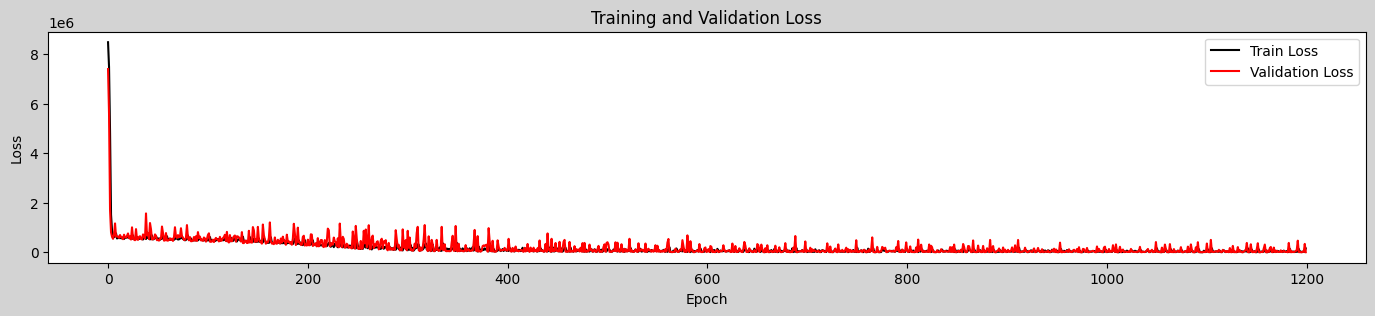

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 3),facecolor='lightgray')
plt.plot(hist.history['loss'], label='Train Loss',color='black')
plt.plot(hist.history['val_loss'], label='Validation Loss',color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



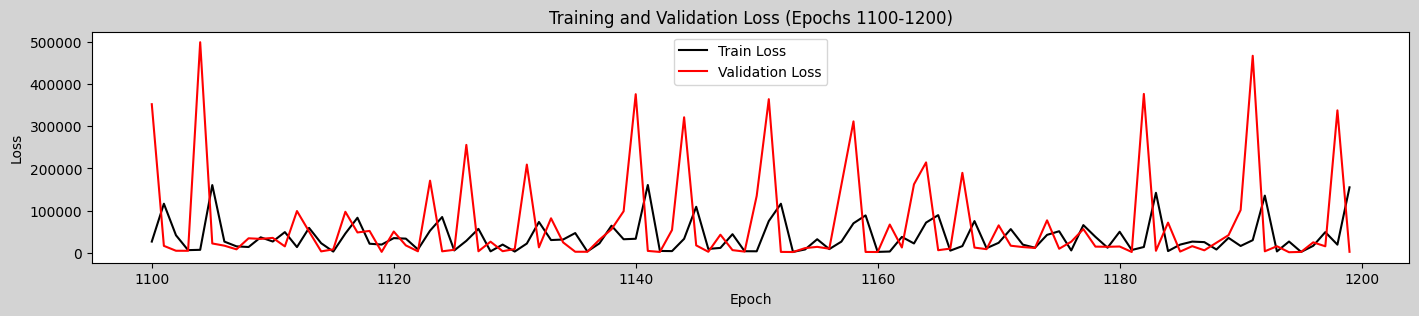

In [33]:
plt.figure(figsize=(17, 3), facecolor='lightgray')
plt.plot(range(1100, 1200), hist.history['loss'][1100:1201], label='Train Loss', color='black')
plt.plot(range(1100, 1200), hist.history['val_loss'][1100:1201], label='Validation Loss', color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss (Epochs 1100-1200)")
plt.legend()
plt.show()




In [34]:
y_pred=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


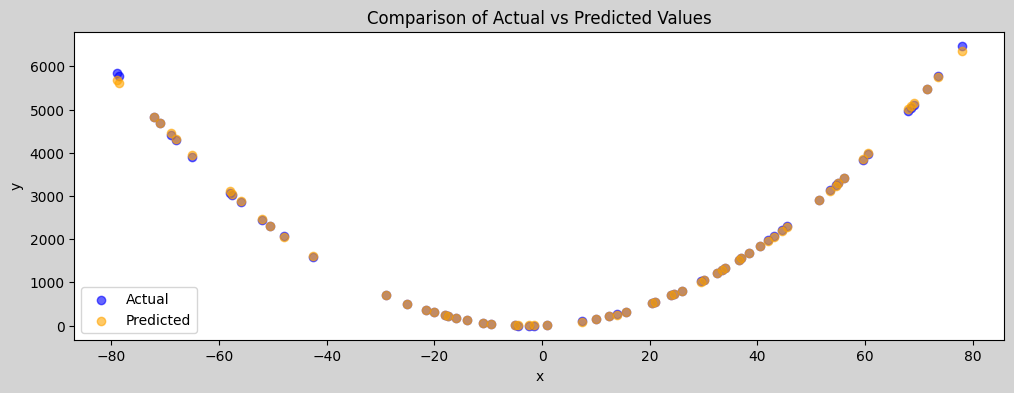

In [35]:
plt.figure(figsize=(12,4), facecolor='lightgray')
plt.scatter(x_test, y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(x_test, y_pred, label='Predicted', color='orange', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Actual vs Predicted Values")
plt.legend()
plt.show()

